# Individual Conditional Expectation Plots to understand XGBoost


## Abstract

In this document I will show how to use **Individual Conditional Expectation Plots** to better understand what a complex model is doing. An ICE plot visualises the dependence of the predicted response on a feature for EACH instance separately, resulting in multiple lines, one for each instance. If you want to know more about Individual Conditional Expectation Plots, look at the great [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/ice.html) book.

I will use the Python [PDPbox](https://github.com/SauceCat/PDPbox) package to calculate and plot the **Individual Conditional Expectation Plots**.

## Importing needed packages

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pdpbox import pdp
from sklearn.externals import joblib

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 6)

Populating the interactive namespace from numpy and matplotlib


## Loading data sets and model

In [3]:
model, training_set, test_set = joblib.load("../../0-model-to-explain/model_and_data_python.sav")

## Calculate and plot Individual Conditional Expectation Plots of interest

We can choose to treat features individually or to combine two or three of them to see the combined influence in the output (as the model sees it).

### Age

Let's start by analysing how the model thinks that the age affects the probability of surviving:


In [4]:
age_training_set = training_set.dropna(axis = 0, subset = ['Age'], how = 'any')
pdp_age = pdp.pdp_isolate(
    model = model, 
    train_X = age_training_set.drop(columns = "Survived"),
    feature = "Age",
    cust_grid_points = list(range(0,100,5))
)

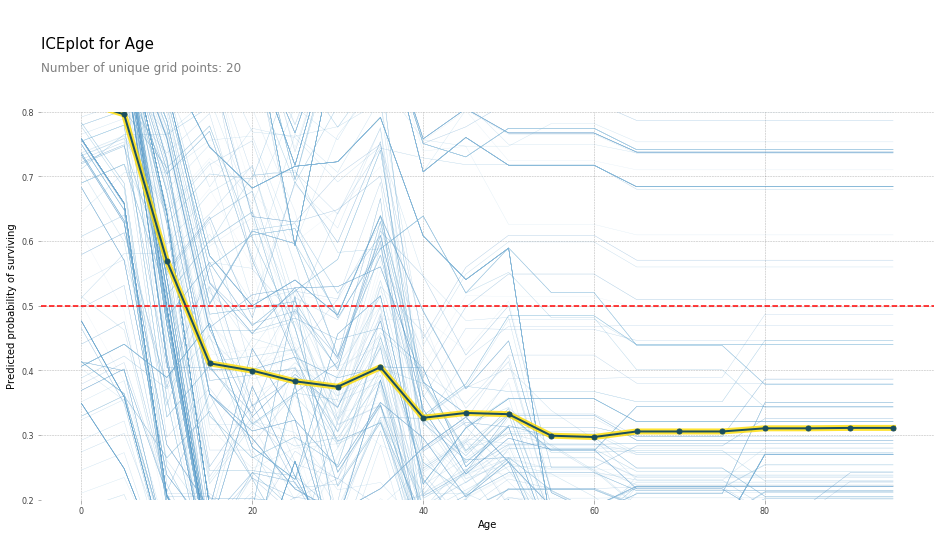

In [5]:
pdp.pdp_plot(pdp_isolate_out = pdp_age, feature_name = "Age", 
             center = False, plot_lines=True)
plt.axhline(y = 0.5, color = "red", linestyle = "--");
plt.ylim(0.2, 0.8);
plt.ylabel("Predicted probability of surviving");

This is very interesting!! There is a general and logical pattern: if you are a child, you survive. And as you get older, your probability of surviving is lower and lower.

But the interesting thing is that the model has other patterns inside!! Some people will not survive, even being children. Others survive always, as if the age was not important for them.

Do these patterns make sense? We should look at the data to find answers. But this insight into the model is of great value to understand what it is doing, and to find possible problems due to the lack of data or other reasons.

Just out of curiosity, let's see which people would have survived at any age according to the model:

In [6]:
lucky_people_index = pdp_age.ice_lines.apply(func = lambda x: np.all(x > 0.8), axis = 1)
print("Number of lucky people: {}".format(sum(lucky_people_index.values)))

Number of lucky people: 104


Wow! 104 people would have survived with prob > 0.8 no matter their age according to the model!!

Let's see who are they:

In [7]:
lucky_people = training_set.loc[lucky_people_index.values]
lucky_people

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
8,1,0,27.0,0,2,11.1333,0,0,1,0,0,1
10,1,0,4.0,1,1,16.7000,0,0,1,0,0,1
14,0,0,14.0,0,0,7.8542,0,0,1,0,0,1
33,0,1,66.0,0,0,10.5000,0,1,0,0,0,1
38,0,0,18.0,2,0,18.0000,0,0,1,0,0,1
46,0,1,NaN,1,0,15.5000,0,0,1,0,1,0
76,0,1,NaN,0,0,7.8958,0,0,1,0,0,1
108,0,1,38.0,0,0,7.8958,0,0,1,0,0,1


I can't find clear patterns. This is strange, and should be explored... Let's do it in [another notebook]() and go on with the ICEs. But this is great! We have found something about our model we do not understand and we want to know more :)

A great point of this package is that we can cluster the lines to see big trends:

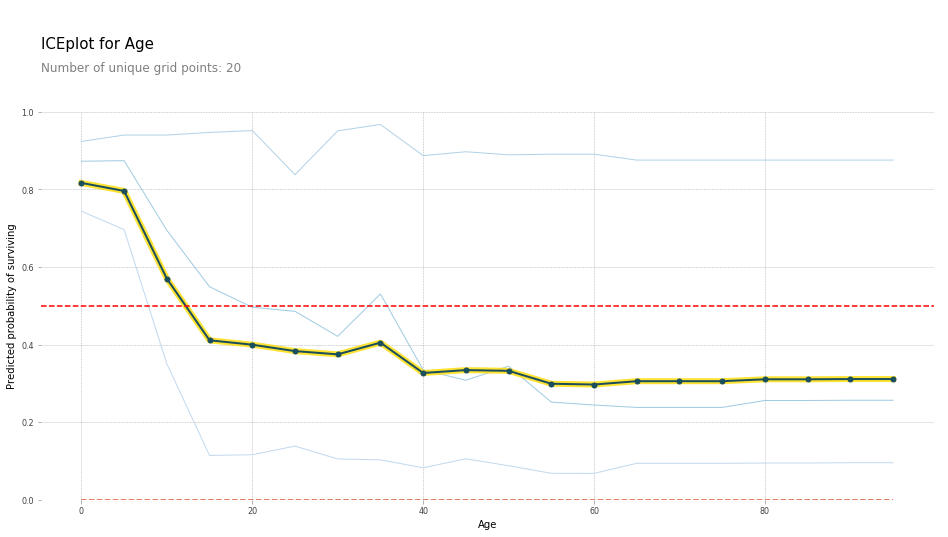

In [8]:
pdp.pdp_plot(pdp_isolate_out = pdp_age, feature_name = "Age", 
             center = False, plot_lines=True, cluster = True, n_cluster_centers = 3)
plt.axhline(y = 0.5, color = "red", linestyle = "--");
plt.ylim(0, 1);
plt.ylabel("Predicted probability of surviving");

Much better! We can see one cluster that follows the main trend, one cluster of lucky people and another cluster of unlucky people.

### Fare

Let's now analyse how the model thinks that the fare affects the probability of surviving:


In [9]:
pdp_fare = pdp.pdp_isolate(
    model = model, 
    train_X = training_set.drop(columns = "Survived"),
    feature = "Fare"
)

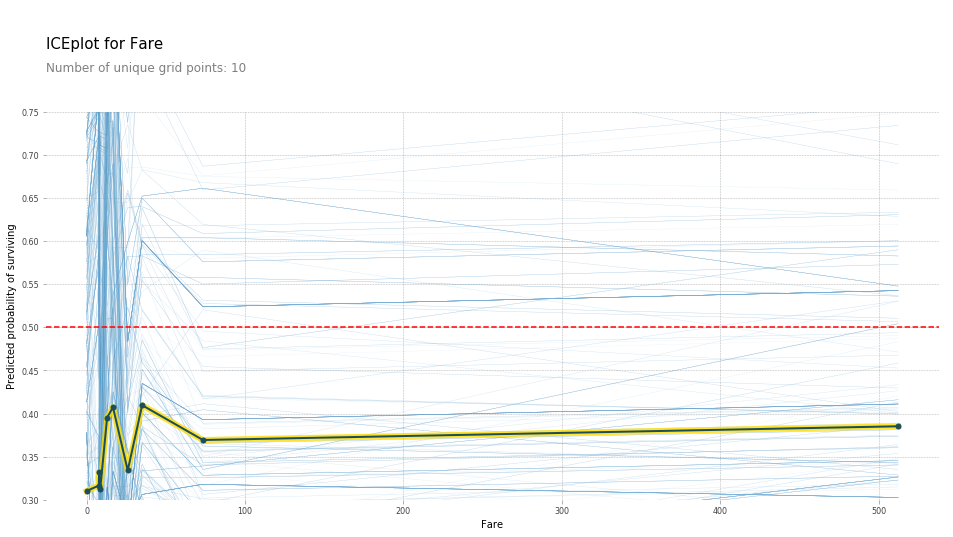

In [10]:
pdp.pdp_plot(pdp_isolate_out = pdp_fare, feature_name = "Fare", 
             center = False, plot_lines=True)
plt.axhline(y = 0.5, color = "red", linestyle = "--");
plt.ylim(0.3, 0.75);
plt.ylabel("Predicted probability of surviving");

Let's use the cluster thing and zoom:

In [11]:
pdp_fare = pdp.pdp_isolate(
    model = model, 
    train_X = training_set.drop(columns = "Survived")[training_set.Fare < 200],
    feature = "Fare"
)

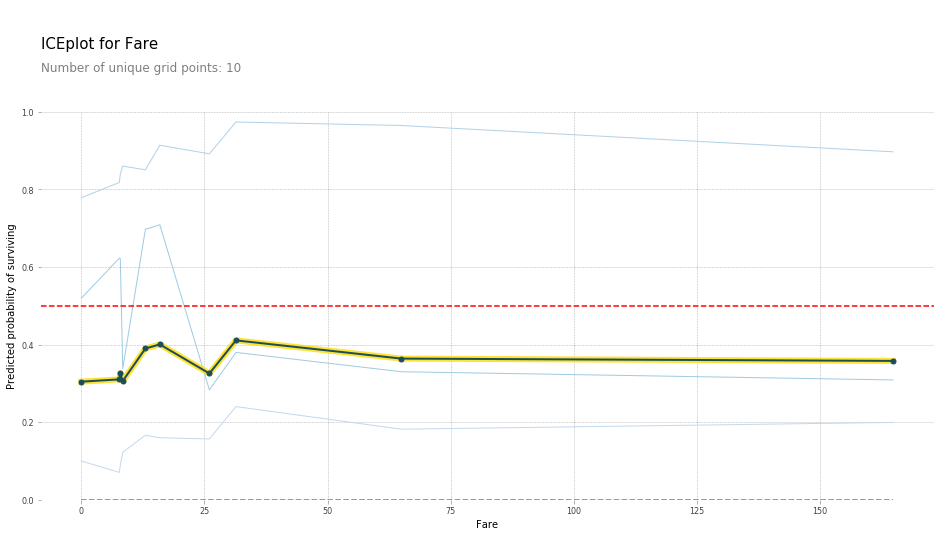

In [12]:
pdp.pdp_plot(pdp_isolate_out = pdp_fare, feature_name = "Fare", 
             center = False, plot_lines=True, cluster=True, n_cluster_centers=3)
plt.axhline(y = 0.5, color = "red", linestyle = "--");
plt.ylim(0, 1);
plt.ylabel("Predicted probability of surviving");

As before, some people never die, others die always, and the rest follow the general trend. It would be interesting to study each group.

## Sex

Let's try to do the same with a cathegorical variable:

In [13]:
pdp_sex = pdp.pdp_isolate(
    model = model, 
    train_X = training_set.drop(columns = "Survived"),
    feature = "Sex"
)

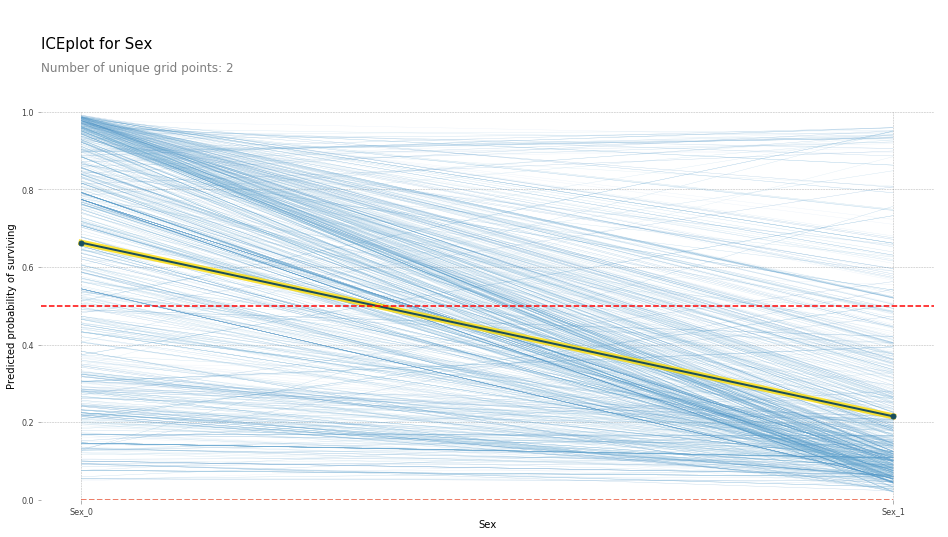

In [14]:
pdp.pdp_plot(pdp_isolate_out = pdp_sex, feature_name = "Sex", 
             center = False, plot_lines=True)
plt.axhline(y = 0.5, color = "red", linestyle = "--");
plt.ylim(0, 1);
plt.ylabel("Predicted probability of surviving");

Sex has a clear influence in the probability of surviving :)
We can measure it in a clearer way by counting the number of survivors in the female zone and the number of survivors in the male zone (remember that we are predicting the same points just changing the Sex value):

In [15]:
print("Survivors in the female zone: {}".format(sum(pdp_sex.ice_lines.Sex_0 >= 0.5)))
print("Survivors in the male zone: {}".format(sum(pdp_sex.ice_lines.Sex_1 >= 0.5)))

Survivors in the female zone: 615
Survivors in the male zone: 100


It is also interesting to see that there are some lines going up, i.e., some passengers have less probability of surviving when being females than when being males. Let's see who are they:

In [16]:
special_people_index = pdp_sex.ice_lines.Sex_1 > pdp_sex.ice_lines.Sex_0
print("There are {} special people".format(sum(special_people_index)))

There are 63 special people


In [17]:
training_set[special_people_index.values]

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
10,1,0,4.00,1,1,16.7000,0,0,1,0,0,1
13,0,1,39.00,1,5,31.2750,0,0,1,0,0,1
43,1,0,3.00,1,2,41.5792,0,1,0,1,0,0
74,1,1,32.00,0,0,56.4958,0,0,1,0,0,1
78,1,1,0.83,0,2,29.0000,0,1,0,0,0,1
86,0,1,16.00,1,3,34.3750,0,0,1,0,0,1
119,0,0,2.00,4,2,31.2750,0,0,1,0,0,1
147,0,0,9.00,2,2,34.3750,0,0,1,0,0,1
165,1,1,9.00,0,2,20.5250,0,0,1,0,0,1
167,0,0,45.00,1,4,27.9000,0,0,1,0,0,1


There are many children. This is an interesting issue worth studying, but it is out of the scope of this PoC.


# Conclusions

ICEs are a great tool to get an idea of what our model is doing, locally and globally, and to find weird behaviors worth investigating.
